# Proyecto 04 - Informe Final de Carrera



## Mejora de Proyecto 03: Procesamiento del Lenguaje Natural 
*Dataset: The Multilingual Amazon Reviews Corpus*

*Mejoras: Entrenaré otro modelo, para ver si consigo mejorar los resultados obtenidos en el proyecto 03. Se modificará la PARTE B del proyecto anterior.
Nuevo modelo a utilizar: Count Vectorizer*






**Monzani Florencia**


# PARTE A - Sin modificaciones 

Parte A - Exploración de Datos: Todo proyecto de Ciencia de Datos empieza con un Análisis Exploratorio de Datos... y todo Análisis Exploratorio de Datos debe responder preguntas. 
El Análisis Exploratorio de Datos debe servir para comprender el dataset y todo el flujo de trabajo que le siga.

Debes responder al menos una pregunta original con este dataset. La pregunta debe estar correctamente explicitada.

**DESCRIPCIÓN DEL DATASET** 

https://docs.opendata.aws/amazon-reviews-ml/readme.html

Se proporciona un conjunto de datos de reseñas de productos de Amazon para la clasificación de texto en español. El conjunto de datos está recopilado entre el 1 de noviembre de 2015 y el 1 de noviembre de 2019. Cada registro del conjunto de datos contiene el texto de la reseña, el título de la reseña, la calificación por estrellas y un ID de revisor anónimo, un ID de producto anónimo y la categoría de producto (por ejemplo, "libros", "electrodomésticos", etc.) El dataset está equilibrado entre estrellas, por lo que cada calificación de estrellas constituye el 20% de las reseñas.


Hay 200.000, 5.000 y 5.000 revisiones en los conjuntos de train, development y test, respectivamente. La cantidad máxima de reseñas por revisor es 20 y la cantidad máxima de reseñas por producto es 20. Todas las reseñas se truncan después de 2000 caracteres y todas las reseñas tienen al menos 20 caracteres.


In [1]:
#LIBRERIAS
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import spacy


In [2]:
#CARGA DE DATASET
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EXPLORACIÓN DE DATASET**

In [3]:
dataset_dep = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_dev.json", lines= True)
dataset_dep.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0417480,product_es_0873923,reviewer_es_0672978,1,"Malisimo, muy grande demasiado aparatoso y mal...",Mala compra,es,wireless
1,es_0180432,product_es_0713146,reviewer_es_0100858,1,No he recibido el pedido no la devolución,No lo he recibido,es,apparel
2,es_0144850,product_es_0356874,reviewer_es_0486447,1,"Tengo que buscar otro sistema, este no funcion...",Que no aprieta bien en el manillar,es,sports
3,es_0339629,product_es_0939832,reviewer_es_0894703,1,Utilicé las brocas de menor diámetro y se me d...,Brocas de mantequilla,es,home_improvement
4,es_0858362,product_es_0489066,reviewer_es_0887663,1,No me gusta su olor a viejo y aspecto malo,No me gusta,es,beauty


In [4]:
dataset_test = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_test.json", lines= True)
dataset_test.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [5]:
dataset_train = pd.read_json("/content/drive/My Drive/Colab Notebooks/Proyecto NLP/dataset_es_train.json", lines= True)
dataset_train.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0491108,product_es_0296024,reviewer_es_0999081,1,Nada bueno se me fue ka pantalla en menos de 8...,television Nevir,es,electronics
1,es_0869872,product_es_0922286,reviewer_es_0216771,1,"Horrible, nos tuvimos que comprar otro porque ...",Dinero tirado a la basura con esta compra,es,electronics
2,es_0811721,product_es_0474543,reviewer_es_0929213,1,Te obligan a comprar dos unidades y te llega s...,solo llega una unidad cuando te obligan a comp...,es,drugstore
3,es_0359921,product_es_0656090,reviewer_es_0224702,1,"No entro en descalificar al vendedor, solo pue...",PRODUCTO NO RECIBIDO.,es,wireless
4,es_0068940,product_es_0662544,reviewer_es_0224827,1,Llega tarde y co la talla equivocada,Devuelto,es,shoes


**Amazon proporciona tres dataset:**

Entrenamiento -> Training

Evaluación -> Test

Valiación -> Deployment (dataset_dep)

-Los dataset de Test y Trainning contienen 5.000 y 200.000 reseñas respectivamente, mientras que Deployment contiene 5.000 reseñas.



In [6]:
dataset_dep.shape

(5000, 8)

In [7]:
dataset_test.shape

(5000, 8)

In [8]:
dataset_train.shape

(200000, 8)

Para abordar este proyecto, haré un join de las tablas de Train y Test (para lograr una mejor partición de Test) y con el dataset de Deployment validaré el modelo.

In [9]:
#JOIN TEST & TRAIN
dataset=pd.concat([dataset_test, dataset_train])
dataset.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0038754,product_es_0113523,reviewer_es_0580071,1,no me llego el articulo me lo mando por correo...,no me llego,es,wireless
1,es_0748979,product_es_0017036,reviewer_es_0819733,1,"la mensajería horrible, no compro mas",amazon sigue sin cumplir en las entregas,es,home
2,es_0411746,product_es_0138642,reviewer_es_0508607,1,Estoy muy decepcionado con el vendedor ya que ...,ESTAFA EN EL ENVÍO,es,toy
3,es_0786686,product_es_0170887,reviewer_es_0491157,1,Mi valoración no es sobre el producto sino sob...,Estafa de Amazon,es,home
4,es_0429700,product_es_0710642,reviewer_es_0008745,1,Pues tenía interés en este libro y probé la ve...,No conseguí pasar de la portada en Kindle,es,digital_ebook_purchase


In [10]:
dataset.shape

(205000, 8)

Calificaciones - ¿ Cómo están balanceadas las etiquetas (estrellas) ?

*Los dataset están equilibrados entre estrellas, por lo que cada calificación de estrellas constituye el 20% de las reseñas,tal como se muestra en los siguientes gráficos:*

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


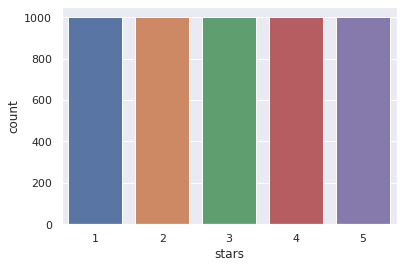

In [11]:
sns.countplot(dataset_dep.stars)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


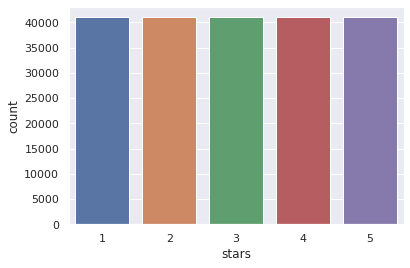

In [12]:
sns.countplot(dataset.stars)
plt.show()

Análisis de valores faltantes por Dataset:

*No se observan valores faltantes en las columnas*

In [13]:
dataset_dep.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

In [14]:
dataset.isna().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
language            0
product_category    0
dtype: int64

Idioma - ¿ Que idiomas tengo disponibles en cada Dataset?

*El idioma de las reseñas en todos los dataset es ESPAÑOL*

In [15]:
dataset_dep.language.value_counts()

es    5000
Name: language, dtype: int64

In [16]:
dataset.language.value_counts()

es    205000
Name: language, dtype: int64

Exploración de reseñas

*Reseña al azar y su calificación:*

In [17]:
index_random = np.random.randint(0,high = dataset_dep.shape[0])
reseña_dep = dataset_dep.iloc[index_random].review_title
print(index_random, reseña_dep)
print(index_random, dataset_dep.iloc[index_random].stars)

3262 Buena relación calidad precio
3262 4


In [18]:
index_random = np.random.randint(0,high = dataset.shape[0])
reseña = dataset.iloc[index_random].review_title
print(index_random, reseña)
print(index_random, dataset.iloc[index_random].stars)

169927 Mejor de lo que pensaba
169927 5


¿ Cúal es la categoría de producto mejor calificada ? ¿ Y la peor ?



DATASET_DEV = *Como puede observarse, la categoría con mejor puntaje promedio asignado es digital_ebook_purchase (compra de libros digitalizados) y la categoría con peor puntaje promedio es musical_instruments (instrumentos musicales).*

In [19]:
ds=dataset_dep.pivot_table('stars', ['product_category'])
ds = ds.sort_values('stars')
ds

,stars
product_category,
musical_instruments,2.652174
lawn_and_garden,2.673267
wireless,2.845238
automotive,2.849711
industrial_supplies,2.911765
video_games,2.930233
shoes,2.933333
home_improvement,2.939799
office_product,2.955357


DATASET = *Como puede observarse, la categoría con mejor puntaje promedio asignado es book (libros ) y la categoría con peor puntaje promedio es lawn_and_garden (productos de jardinería).*

In [20]:
ds=dataset.pivot_table('stars', ['product_category'])
ds = ds.sort_values('stars')
ds

,stars
product_category,
lawn_and_garden,2.765179
wireless,2.820923
apparel,2.867029
electronics,2.887772
jewelry,2.925137
beauty,2.935703
automotive,2.958208
home,2.982869
pet_products,2.993176


# PARTE B - Sin modificaciones

Parte B - Modelo de Machine Learning. En esta sección deberás aplicar las técnicas de Machine Learning aprendidas para crear un modelo predictivo a partir del dataset provisto.

Debes evaluar correctamente el modelo que realices. Esto implica un correcto manejo de datos de Train y Test, elegir una métrica apropiada y justificar su elección, y comparar los resultados contra un modelo benchmark.


**TOKENIZACIÓN**

Pasar de un único string de texto a una lista de string de oraciones.

In [ ]:
#importo spacy en español
import spacy.cli
spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
from spacy import displacy

In [ ]:
#Para generar un análisis se tiene que crear un objeto del modelo
nlp = spacy.load('es_core_news_sm') 

In [ ]:
#Analizando el texto con Spacy, la variable doc contiene una versión analizada del texto, 
#aunque aparentemente se mantuvo sin cambios se generaron atributos y propiedades partidas
# del análisis del texto
doc=nlp(reseña)
print(doc)

Cómodos y fijos al oido


In [ ]:
#Para tokenizar oraciones
for num,oracion in enumerate(doc.sents):
    print(f'{num}: {oracion}')

#Una oración, por ser el titular 

0: Cómodos y fijos al oido


In [ ]:
#Para tokenizar palabras
for palabra in doc:
    print(palabra.text)

Cómodos
y
fijos
al
oido


In [ ]:
from spacy.pipeline import EntityRuler
nlp = spacy.load('es_core_news_sm')
ruler = EntityRuler(nlp, overwrite_ents=True)
#Esto es para que me deje sobreescribir el pipeline

In [ ]:
#Separo en oraciones a la reseña
orac = nlp.create_pipe('sentencizer') # En esta primer etapa del Pipeline, separo las frases
nlp.add_pipe(orac, before='parser')  #identifica componentes gramaticales y los vuelve oración
doc=nlp(reseña)
for orac in doc.sents: #(.sents es para mostrar las oraciones en frases, en este caso hay una sola)
    print(orac)

Cómodos y fijos al oido


In [ ]:
# Para hacer una lista de tokens
lista_palabras=[palabra.text.replace('\n','') for palabra in doc[:30]]
print(lista_palabras)

['Cómodos', 'y', 'fijos', 'al', 'oido']


In [ ]:
#Stop Words de es_core_news_sm
from spacy.lang.es.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)
print(stopwords_spacy)
len(stopwords_spacy)

['debajo', 'llegó', 'tampoco', 'realizar', 'sé', 'creo', 'horas', 'cuatro', 'sabemos', 'ésta', 'ti', 'varios', 'dias', 'queremos', 'cierta', 'todavia', 'aquellos', 'nuevos', 'suyas', 'mientras', 'ejemplo', 'poder', 'pocas', 'ellos', 'sus', 'están', 'además', 'haciendo', 'toda', 'durante', 'ni', 'sólo', 'tendrán', 'medio', 'tenemos', 'estan', 'sería', 'estar', 'total', 'hacerlo', 'ya', 'haces', 'uso', 'dijeron', 'como', 'hicieron', 'estaba', 'parte', 'buenos', 'dio', 'según', 'si', 'haya', 'tres', 'arribaabajo', 'vuestros', 'ningún', 'al', 'valor', 'podría', 'veces', 'ultimo', 'hablan', 'tuyo', 'largo', 'final', 'cuántas', 'aquélla', 'un', 'muchos', 'desde', 'era', 'manera', 'pueda', 'solamente', 'está', 'conseguimos', 'peor', 'próximos', 'siete', 'la', 'nunca', 'soyos', 'quién', 'empleais', 'raras', 'mencionó', 'lugar', 'sois', 'vosotros', 'sabes', 'buena', 'acuerdo', 'propio', 'vuestra', 'otras', 'segun', 'podriais', 'mediante', 'una', 'nosotros', 'trabaja', 'primera', 'somos', 'dar',

551

In [ ]:
#Elimino Stopwords de la reseña
for palabra in doc:
    if palabra.is_stop == False:
        print(palabra)

Cómodos
y
fijos
oido


In [ ]:
#Lemmatización
doc = nlp(reseña)
for lem in doc:
    print(lem.text, lem.lemma_)

Cómodos Cómodos
y y
fijos fijo
al al
oido oido


**DATASET COMPLETO**

**MODELO**

* Benchmark: utilizo como feature REVIEW TITTLE (Título de Reseña)

* Modelo: utilizo como feature REVIEW BODY (Cuerpo de Reseña)

In [ ]:
#Importo librerías de aprendizaje
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#signos de puntuación
import string
puntua = string.punctuation + '¡¿'
puntua

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~¡¿'

In [ ]:
#Función para limpieza de datos
def text_data_cleaning(sentence):
    doc = nlp(sentence)
    
    palabras = []
    for palabra in doc:
        if palabra.lemma_ != "-PRON-":
            temp = palabra.lemma_.strip()
        else:
            temp = palabra
        palabras.append(temp)
    
    clean_palabras = []
    for palabra in palabras:
        if palabra not in stopwords_spacy and palabra not in puntua:
            clean_palabras.append(palabra)
    
    return clean_palabras

In [ ]:
#Ej. para probar función

text_data_cleaning(reseña)

['Cómodos', 'y', 'fijo', 'oido']

In [ ]:
#VECTORIZACIÓN

#importo librería de vectorización
from sklearn.svm import LinearSVC

In [ ]:
#Defino la función de tokenizado y creo el clasificador
tfidf = TfidfVectorizer(tokenizer = text_data_cleaning)
classifier = LinearSVC()

*Benchmark*

In [ ]:
#Creo los vectores de datos
X = dataset['review_title']
y = dataset['stars']

In [ ]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [ ]:
X_train.head()

196144                                             Práctico
60473                                          No muy bueno
76076     es bonito y parece buen material, pero si se d...
170434                                                    A
26744                                           Son dina a5
Name: review_title, dtype: object

In [ ]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [ ]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7faa901c2f28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [ ]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)

In [ ]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.53      0.57      0.55     12311
           2       0.36      0.32      0.34     12204
           3       0.35      0.26      0.30     12161
           4       0.34      0.42      0.37     12385
           5       0.47      0.50      0.49     12439

    accuracy                           0.41     61500
   macro avg       0.41      0.41      0.41     61500
weighted avg       0.41      0.41      0.41     61500



In [ ]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[6992, 2387,  976, 1207,  749],
       [3164, 3876, 2438, 1726, 1000],
       [1466, 2611, 3136, 3483, 1465],
       [ 853, 1152, 1487, 5237, 3656],
       [ 664,  862,  811, 3911, 6191]])

In [ ]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([2])

In [ ]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([2])

Se obtuvo en el modelo de Benchmark un accuracy de 0,41. Puede comprobarse el bajo desempeño del modelo en la predicción de la frase 1 ("Realmente me gustó mucho"), la cual fue puntuada con 2 estrellas, cuando a priori pareciera merecer 4 o 5.

*Modelo* 

In [ ]:
#Creo los vectores de datos
X = dataset['review_body']
y = dataset['stars']

In [ ]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [ ]:
X_train.head()

196144    Buen cable, parece resistente y no se enreda f...
60473                         Se le rompió esa misma tarde.
76076     al de 10 o 12 dias se despego y tuve que compr...
170434                          Perfecto y de buena calidad
26744     Este producto indica q es dina a4 pero no es a...
Name: review_body, dtype: object

In [ ]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [ ]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7faa901c2f28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [ ]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)


In [ ]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.65      0.60     12311
           2       0.36      0.32      0.34     12204
           3       0.33      0.30      0.31     12161
           4       0.37      0.31      0.34     12385
           5       0.52      0.62      0.57     12439

    accuracy                           0.44     61500
   macro avg       0.43      0.44      0.43     61500
weighted avg       0.43      0.44      0.43     61500



In [ ]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[8008, 2293, 1083,  510,  417],
       [3409, 3930, 2778, 1203,  884],
       [1726, 2823, 3637, 2384, 1591],
       [ 727, 1298, 2315, 3842, 4203],
       [ 528,  634, 1137, 2380, 7760]])

In [ ]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([5])

In [ ]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([5])

Se obtuvo en el modelo final un accuracy de 0,44 . Comparando con el modelo benchmark se observa una mejora, por ejemplo en la frase 1 que obtuvo 2 estrellas, ahora fue clasificada con 5.

*MODELO en Dataset Development*

Para validar el funcionamiento del modelo, aplicaré el mismo en el dataset de validación.


In [ ]:
#Creo los vectores de datos
X = dataset_dep['review_body']
y = dataset_dep['stars']

In [ ]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

In [ ]:
X_train.head()

1840    Falta cristal para tapar toda la pantalla, que...
2115    La distancia entre el tubo superior y el infer...
4437    Ligero, la señal de GPS es muy rápida, prestac...
1146    Producto caro, es correcto pero con el precio ...
2486          Esta bien, no sirve para Citroën y Peugeot.
Name: review_body, dtype: object

In [ ]:
#Creo un pipeline
clf = Pipeline([('tfidf', tfidf), ('clf', classifier)])

In [ ]:
#Entreno el clasificador
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function text_data_cleaning at 0x7faa901c2f28>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept

In [ ]:
#Valores predichos a partir del clasificador
y_pred = clf.predict(X_test)

In [ ]:
#Precisión obtenida
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.49      0.53      0.51       316
           2       0.29      0.27      0.28       309
           3       0.31      0.32      0.31       284
           4       0.32      0.29      0.30       301
           5       0.45      0.48      0.47       290

    accuracy                           0.38      1500
   macro avg       0.37      0.38      0.38      1500
weighted avg       0.37      0.38      0.38      1500



In [ ]:
#Creo la matriz de confusión
confusion_matrix(y_test, y_pred)

array([[168,  78,  43,  17,  10],
       [ 89,  84,  61,  48,  27],
       [ 41,  58,  90,  53,  42],
       [ 25,  41,  56,  87,  92],
       [ 17,  28,  40,  65, 140]])

In [ ]:
#Predicción: algunas frases de prueba [ej.1]
clf.predict(['Realmente me gustó mucho'])

array([3])

In [ ]:
#Predicción: algunas frases de prueba [ej.2]
clf.predict(['Horrible, no me gustó'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.3]
clf.predict(['Llegó bien'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.4]
clf.predict(['Es lo que esperaba, pero no llegó a tiempo'])

array([1])

In [ ]:
#Predicción: algunas frases de prueba [ej.5]
clf.predict(['Esperaba mayor calidad'])

array([3])

El accuracy obtenido del modelo aplicado al dataset de validación es también muy bajo (0,38), tal como lo esperaba.

# PARTE B - Con Modificaciones

**MODELO** -  *en DATASET*

**Benchmark**: utilizo como feature REVIEW TITTLE (Título de Reseña)

**Modelo**: utilizo como feature REVIEW BODY (Cuerpo de Reseña)

In [54]:
#Importo librerias 
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords

In [55]:
#Descargo stopwords 

nltk.download('stopwords')
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
#Cantidad de stopwords: 313
len(stop_words)

313

*BENCHMARK*

In [58]:
X = dataset['review_title']
y = dataset['stars']

In [59]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [60]:
#Modelo CountVectorizer
cv = CountVectorizer()

In [61]:
x_traincv=cv.fit_transform(X_train)
x_traincv

<143500x20335 sparse matrix of type '<class 'numpy.int64'>'
	with 454132 stored elements in Compressed Sparse Row format>

In [62]:
#Clasificador a utilizar: "Multinomial Naive Bayes Classifier" con Count Vectorizer
# Entreno el modelo
mnb_trained = MultinomialNB().fit(x_traincv, y_train)

In [63]:
x_testcv = cv.transform(X_test)

In [64]:
#Predicciones
pred = mnb_trained.predict(x_testcv)
pred

array([3, 2, 1, ..., 5, 2, 5])

In [65]:
#Clasificaciones Originales
actual=np.array(y_test)
actual

array([2, 2, 1, ..., 4, 4, 5])

In [66]:
# Código para ver resultados de forma tabular
messg = []
for msg in X_test:
    messg.append(msg)
predictions = []
for x in pred:
    predictions.append(x)
original = []
for i in y_test:
    original.append(i)

In [67]:
# En el siguiente cuadro se observa la REVIEW y la CLASIFICACION ORIGINAL y PREDICHA
dataf = pd.DataFrame({'STARS_ORIGINALES' : original,
                      'STARS_PREDICCIONES' : predictions,
                     'TEXT' : messg})
dataf

,STARS_ORIGINALES,STARS_PREDICCIONES,TEXT
0,2,3,Mezcla de quizás algodón con material sintético
1,2,2,Poca luz
2,1,1,Preguntais y aun no he recibido el pedido
3,3,2,Baterías de poca duración
4,4,1,El wifi no se activa
...,...,...,...
61495,3,3,No se puede pedir más por el precio que tienen
61496,4,4,Bien relscion precio
61497,4,5,Realmente silenciosa
61498,4,2,Muy prácticos cada una de las piezas.


In [68]:
#ACCURACY
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count=count+1
print("Obtuve",count,"predicciones correctas de",len(pred),".")
print("Eso nos da un accuracy de ",(count/len(pred))*100)

Obtuve 28343 predicciones correctas de 61500 .
Eso nos da un accuracy de  46.08617886178862


*MODELO*

In [69]:
X = dataset['review_body']
y = dataset['stars']

In [70]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((143500,), (61500,), (143500,), (61500,))

In [71]:
#Modelo CountVectorizer
cv = CountVectorizer()

In [72]:
x_traincv=cv.fit_transform(X_train)
x_traincv

<143500x49753 sparse matrix of type '<class 'numpy.int64'>'
	with 3168881 stored elements in Compressed Sparse Row format>

In [73]:
#Clasificador a utilizar: "Multinomial Naive Bayes Classifier" con Count Vectorizer
# Entreno el modelo
mnb_trained = MultinomialNB().fit(x_traincv, y_train)

In [74]:
x_testcv = cv.transform(X_test)

In [75]:
#Predicciones
pred = mnb_trained.predict(x_testcv)
pred

array([3, 2, 1, ..., 4, 5, 5])

In [76]:
#Clasificaciones Originales
actual=np.array(y_test)
actual

array([2, 2, 1, ..., 4, 4, 5])

In [77]:
# Código para ver resultados de forma tabular
messg = []
for msg in X_test:
    messg.append(msg)
predictions = []
for x in pred:
    predictions.append(x)
original = []
for i in y_test:
    original.append(i)

In [78]:
# En el siguiente cuadro se observa la REVIEW y la CLASIFICACION ORIGINAL y PREDICHA
dataf = pd.DataFrame({'STARS_ORIGINALES' : original,
                      'STARS_PREDICCIONES' : predictions,
                     'TEXT' : messg})
dataf

,STARS_ORIGINALES,STARS_PREDICCIONES,TEXT
0,2,3,"Le tuve que devolver sin Abrir, nada mas tocar..."
1,2,2,Da menos luz que otras que he comprado. Trae u...
2,1,1,"Por ahora mal, ya que lleva retrasado cuatro d..."
3,3,2,"Escasa duración de las baterías, apenas te da ..."
4,4,3,Tengo un portátil HP con Windows 10 y bueno al...
...,...,...,...
61495,3,4,Cumple con lo esperado. No es la mejor calidad...
61496,4,3,Están bien aunque por la foto pensé que tenían...
61497,4,4,Es de muy pequeño tamaño y mucho más silencios...
61498,4,5,"Es un buen producto, de calidad media. Genial ..."


In [79]:
#ACCURACY
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count=count+1
print("Obtuve",count,"predicciones correctas de",len(pred),".")
print("Eso nos da un accuracy de ",(count/len(pred))*100)

Obtuve 30108 predicciones correctas de 61500 .
Eso nos da un accuracy de  48.95609756097561


**Se logran 2 puntos más de Accuary que en el Modelo Benchmark.**

***MODELO en Dataset Development***

Para validar el funcionamiento del modelo, aplicaré el mismo en el dataset de validación.

In [81]:
X = dataset_dep['review_body']
y = dataset_dep['stars']

In [82]:
#Creo el vector de entrenamiento como una porción de los datos y dejo el resto para pruebas #test 0.3, train= 0.7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500,), (1500,), (3500,), (1500,))

In [83]:
#Modelo CountVectorizer
cv = CountVectorizer()

In [84]:
x_traincv=cv.fit_transform(X_train)
x_traincv

<3500x9059 sparse matrix of type '<class 'numpy.int64'>'
	with 76467 stored elements in Compressed Sparse Row format>

In [85]:
#Clasificador a utilizar: "Multinomial Naive Bayes Classifier" con Count Vectorizer
# Entreno el modelo
mnb_trained = MultinomialNB().fit(x_traincv, y_train)

In [86]:
x_testcv = cv.transform(X_test)

In [87]:
#Predicciones
pred = mnb_trained.predict(x_testcv)
pred

array([2, 2, 1, ..., 2, 2, 3])

In [88]:
#Clasificaciones Originales
actual=np.array(y_test)
actual

array([2, 3, 3, ..., 2, 3, 2])

In [89]:
# Código para ver resultados de forma tabular
messg = []
for msg in X_test:
    messg.append(msg)
predictions = []
for x in pred:
    predictions.append(x)
original = []
for i in y_test:
    original.append(i)

In [90]:
# En el siguiente cuadro se observa la REVIEW y la CLASIFICACION ORIGINAL y PREDICHA
dataf = pd.DataFrame({'STARS_ORIGINALES' : original,
                      'STARS_PREDICCIONES' : predictions,
                     'TEXT' : messg})
dataf

,STARS_ORIGINALES,STARS_PREDICCIONES,TEXT
0,2,2,quería 3 rollos y me los han mandado de distin...
1,3,2,"Calidad perfecto, pero solo cubre la parte que..."
2,3,1,La tienda se tuvo que descambiar porque venía ...
3,2,1,Sería perfecto pero una vez instalado pierde u...
4,1,1,El ancho de la funda no llega a los laterales ...
...,...,...,...
1495,4,5,Evita que el calzado golpee el tambor de la la...
1496,2,2,"Cuando lo compré, ponía que llegaba el día 4, ..."
1497,2,2,No me a gustado mucho no deja muy bien alisado
1498,3,2,La batería dura muy poco.


In [91]:
#ACCURACY
count=0
for i in range (len(pred)):
    if pred[i]==actual[i]:
        count=count+1
print("Obtuve",count,"predicciones correctas de",len(pred),".")
print("Eso nos da un accuracy de ",(count/len(pred))*100)

Obtuve 630 predicciones correctas de 1500 .
Eso nos da un accuracy de  42.0


El accuracy obtenido del modelo aplicado al dataset de validación es unos puntos menos que el obtenido en el dataset completo: 0.42 vs 0.48.

# PARTE C - Con Modificaciones

Dado los resultados obtenidos, las conlusiones a las que llego son las siguientes:

**En cuanto a la base de datos:**

Antes de tomar esta base de datos como input para predecir como valorará una persona a un producto, debería corroborarse que éstas personas que ya evaluaron, fueron coherentes con lo que dejaron asentado en la reseña (título y cuerpo) y con la cantidad de estrellas que asignaron. También debería complementarse esta información con alguna encuesta de satisfacción o alguna otra información que nos permita validar las clasificaciones o inferir según nuestros criterios (los de la encuesta por ejemplo) si tiene 1,2,3,4 o 5 estrellas. Propongo esto, dado que las reseñas son muy subjeitvas: Por ej.: Hay casos en que una reseña que dice: "Ok", puede ser puntuada con 3 estrellas o con 5; también hay casos en que las reseñas no tienen sentido como por ej.: "hghg", al parecer éstas personas no querían dejar asentado nada y simplemente asignaron estrellas, en otros casos las reseñas parecerían merecer más o menos estrellas de las que tienen etc. ... 

**En cuanto al modelo:**

Se nota una mejora en el accuracy obtenido con Count Vectorizer tanto para Benchmark(de  proy03: 0.41 a proy04: 0.46), 
Modelo (de proy03:0.44 a proy04:0.48) 
y Modelo base development (de proy03: 0.38 a proy04:0.42).

Conclusión: el modelo Count Vectorizer es mejor que TFidVectorizer, pero el resultado sigue siendo muy bajo (ver texto anterior "En cuanto a la base de datos...")

**Otras sugerencias:**

-Investigar otras librerías
-Mejorar coherencia en base de datos 








¡ MUCHAS GRACIAS !


Florencia Monzani 